## 1. Data Integration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
customers = pd.read_sas("a2z_insurance.sas7bdat")

In [3]:
customers.set_index('CustID', inplace = True)

In [4]:
customers.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


## 2. Data Exploration

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10279 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [6]:
customers.describe()

,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,1991.062634,1968.007783,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,511.267913,19.709476,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1974.000000,1028.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,1953.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,1986.000000,1968.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,1992.000000,1983.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,53784.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [7]:
customers.isnull().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [8]:
customers[customers.duplicated()]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
8014.0,1987.0,1987.0,b'2 - High School',1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
8122.0,1977.0,1974.0,b'2 - High School',2204.0,4.0,1.0,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
9554.0,1986.0,1952.0,b'2 - High School',3900.0,4.0,0.0,-119.35,1.10,163.03,481.75,224.82,94.35,18.56


In [9]:
customers[customers.index==8122]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
8122.0,1977.0,1974.0,b'2 - High School',2204.0,4.0,1.0,-22.11,1.0,214.93,88.9,266.94,39.23,42.12


<AxesSubplot:xlabel='BirthYear'>

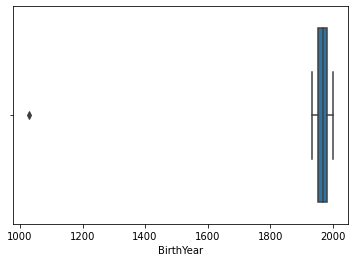

In [10]:
sns.boxplot(x="BirthYear", data = customers[['BirthYear']])

In [13]:
customers['EducDeg'].value_counts(dropna=False)

b'3 - BSc/MSc'        4799
b'2 - High School'    3510
b'1 - Basic'          1272
b'4 - PhD'             698
NaN                     17
Name: EducDeg, dtype: int64

## 3. Data Preprocessing

### 3.1 Encoding

In [16]:
customers['EducDeg'].replace(to_replace = "b'4 - PhD'",value = 3, inplace = True)
customers['EducDeg'].replace(to_replace = "b'3 - BSc/MSc'",value = 2, inplace = True)
customers['EducDeg'].replace(to_replace = "b'2 - High School'",value = 1, inplace = True)
customers['EducDeg'].replace(to_replace = "b'1 - Basic'",value = 0, inplace = True)
customers['EducDeg'].value_counts(dropna=False)

b'3 - BSc/MSc'        4799
b'2 - High School'    3510
b'1 - Basic'          1272
b'4 - PhD'             698
NaN                     17
Name: EducDeg, dtype: int64